In [32]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
file = np.load('./Data/Training data/training.npz')
# len(file['ytrue'])
X_data = file['xdata']
# y_true = file['ytrue']

In [58]:
def calc_deriative(spectrum, outp_shape = (1, 230)):
    der = []
    for i in range(1, len(spectrum) - 2):
        der.append(sum(spectrum[i+1:i+3]) - sum(spectrum[i-1:i+1]))
    return cv2.resize(np.array(der), outp_shape)

def calc_integral(spectrum, outp_shape = (1, 230)):
    spectrum = np.interp(spectrum, (spectrum.min(), spectrum.max()), (-1, 1))
    itg = []
    for i in range(len(spectrum)):
        if i == 0:
            itg.append(spectrum[i])
        else:
            itg.append(itg[-1] + spectrum[i])
    return cv2.resize(np.array(itg), outp_shape)

def input_norm(spectrum):
    mean = spectrum.mean()
    std = spectrum.std()
    
    return (spectrum.copy() - mean)/std

In [61]:
def preprocess_spectrum(spectrum, outp_shape = (1, 230)):
    first_der = calc_deriative(spectrum, outp_shape)
    output = np.concatenate([
        input_norm(calc_integral(spectrum, outp_shape)),
        input_norm(cv2.resize(spectrum, outp_shape)),
        input_norm(first_der),
        input_norm(calc_deriative(first_der, outp_shape))
    ], 1)
    print(output.shape)
    return output

(230, 4)


Text(0.5, 0, '1st Deriative Normalized')

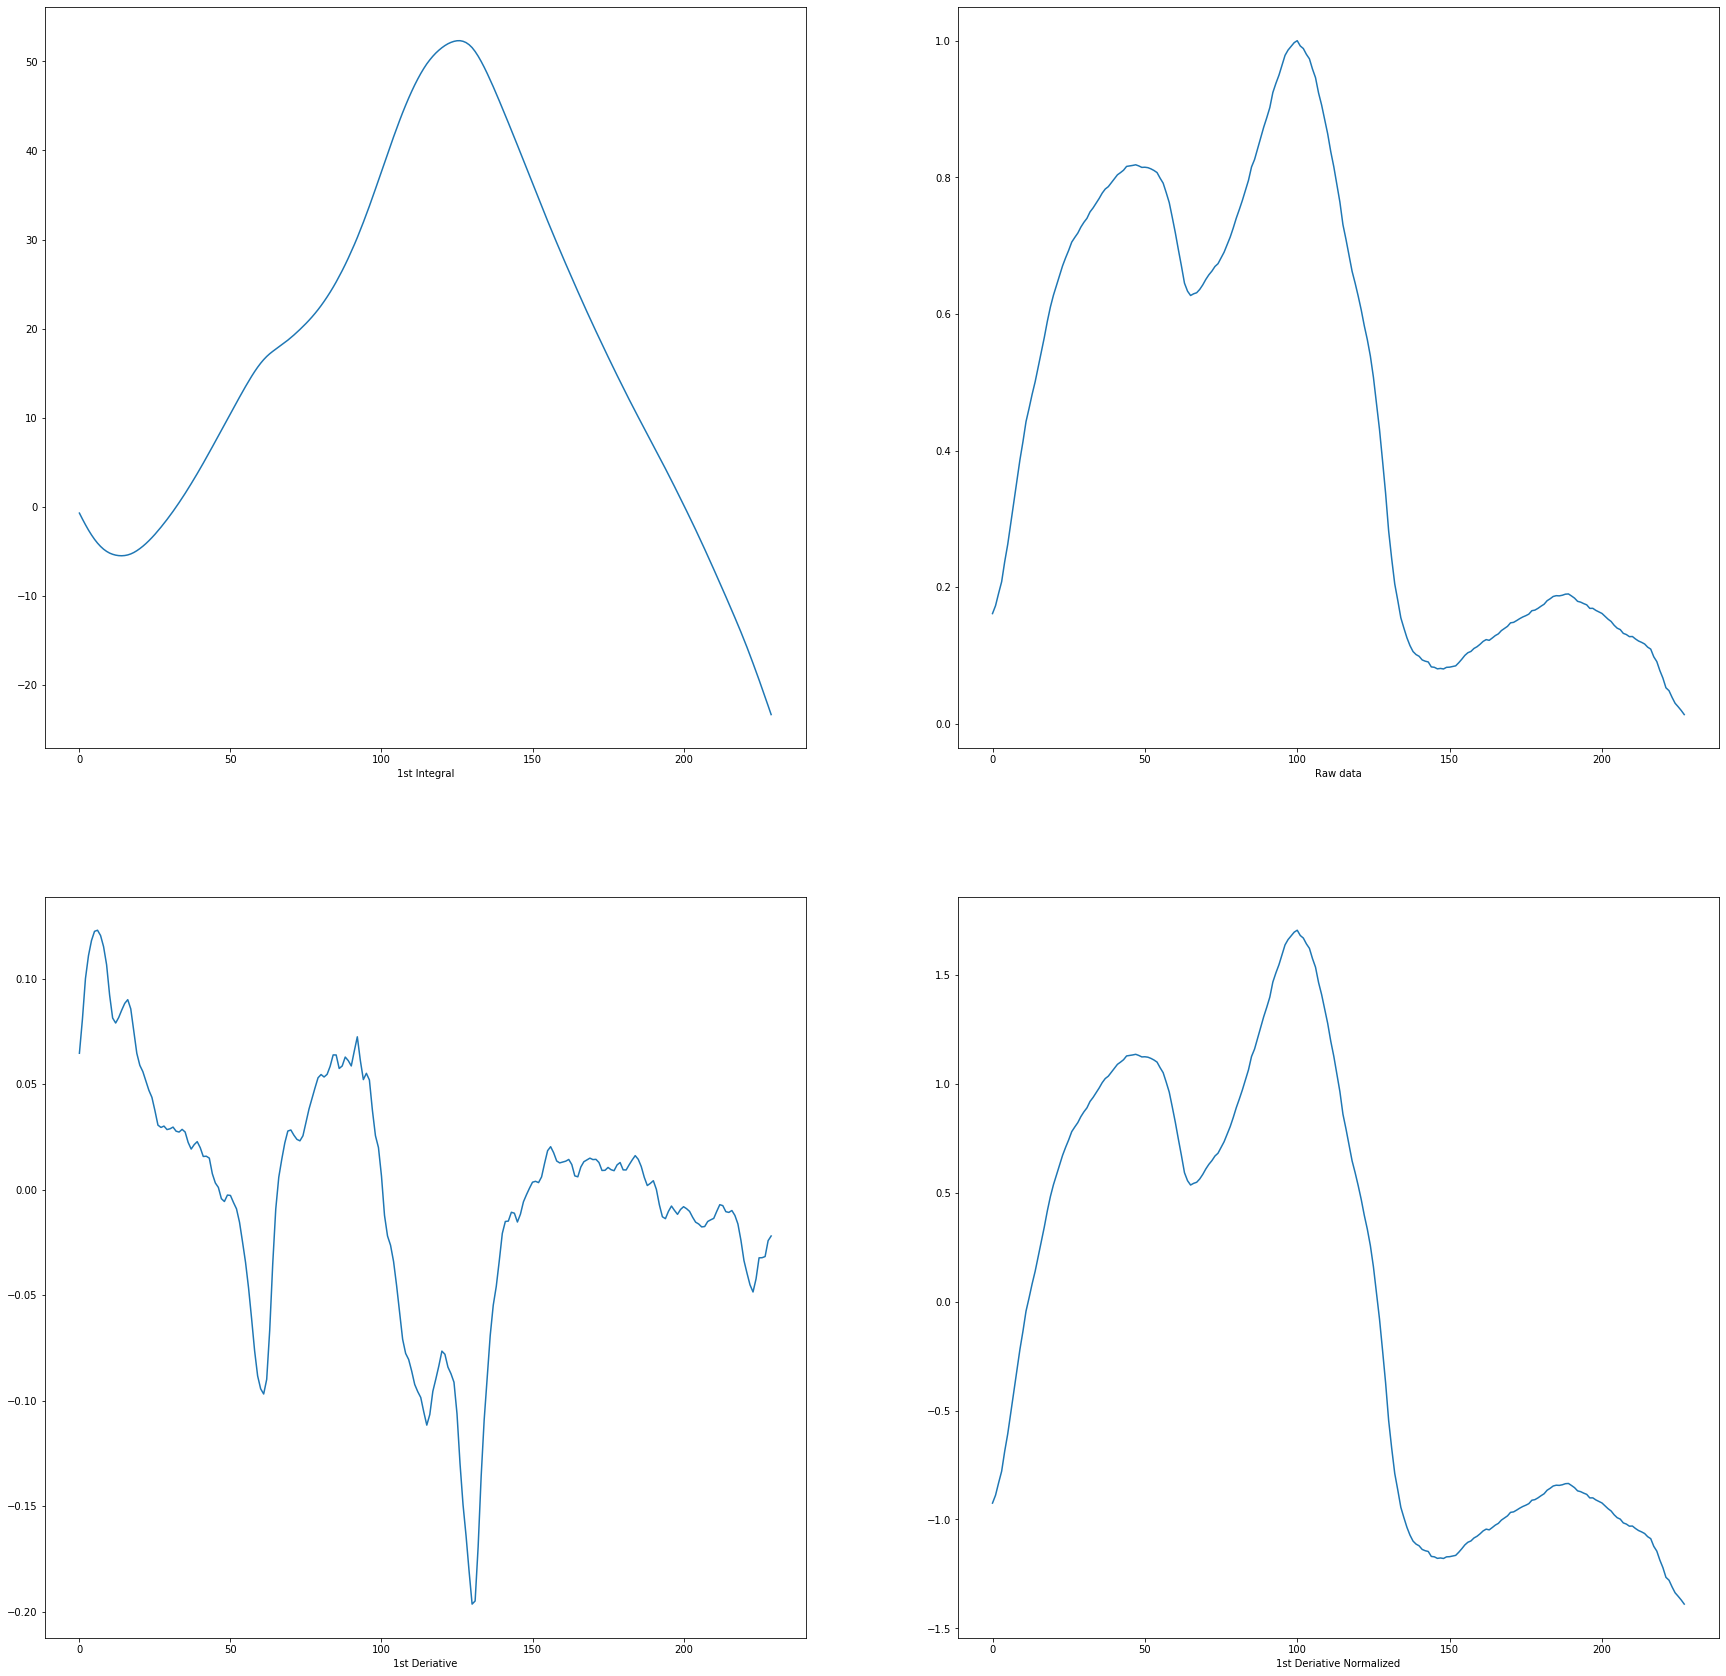

In [62]:
rand = np.random.randint(len(X_data))
preprocess_data = preprocess_spectrum(X_data[rand])
plt.figure(figsize=(30, 30))

plt.subplot(2, 2, 1)
plt.plot(preprocess_data[0])
plt.xlabel('1st Integral')

plt.subplot(2, 2, 2)
plt.plot(preprocess_data[0])
plt.xlabel('Raw data')

plt.subplot(2, 2, 3)
plt.plot(preprocess_data[0])
plt.xlabel('1st Deriative')

plt.subplot(2, 2, 4)
plt.plot(preprocess_data[0])
plt.xlabel('2nd Deriative')

In [18]:
der = calc_deriative(X_data[rand])
print(cv2.resize(der, (1, 230)))

(225, 1)
[[ 0.67950478]
 [ 0.64530999]
 [ 0.6646204 ]
 [ 0.73764391]
 [ 0.82941965]
 [ 0.89616941]
 [ 0.93456904]
 [ 0.99015288]
 [ 0.99640168]
 [ 0.88127511]
 [ 0.74618726]
 [ 0.67749966]
 [ 0.65054989]
 [ 0.64270282]
 [ 0.6500118 ]
 [ 0.66742084]
 [ 0.6950776 ]
 [ 0.71275796]
 [ 0.73126639]
 [ 0.75852409]
 [ 0.7340643 ]
 [ 0.66025566]
 [ 0.60869408]
 [ 0.58443615]
 [ 0.55174755]
 [ 0.51419436]
 [ 0.48804361]
 [ 0.46174837]
 [ 0.42571935]
 [ 0.39594393]
 [ 0.38073972]
 [ 0.37265236]
 [ 0.35729543]
 [ 0.33708143]
 [ 0.32474768]
 [ 0.31636623]
 [ 0.30221948]
 [ 0.28752815]
 [ 0.28298784]
 [ 0.28395129]
 [ 0.28983614]
 [ 0.3004802 ]
 [ 0.31670948]
 [ 0.32414308]
 [ 0.3109469 ]
 [ 0.30105063]
 [ 0.3039644 ]
 [ 0.32255223]
 [ 0.34090892]
 [ 0.32956106]
 [ 0.31292162]
 [ 0.31495596]
 [ 0.32504569]
 [ 0.3254964 ]
 [ 0.30488653]
 [ 0.27832499]
 [ 0.24727432]
 [ 0.18997443]
 [ 0.11420515]
 [ 0.03942935]
 [-0.01715928]
 [-0.04812157]
 [-0.06035371]
 [-0.05127309]
 [ 0.00207683]
 [ 0.10025502]
 

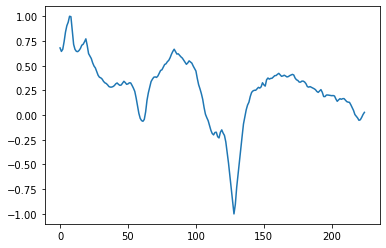

In [19]:
plt.plot(der)